In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os 

In [17]:
os.listdir("./data")

['r3.txt',
 'r5.txt',
 'r4.txt',
 '10core.txt',
 'python.txt',
 'cpp.txt',
 '5core.txt',
 '20core.txt',
 '.ipynb_checkpoints']

In [18]:
r3 = np.loadtxt(os.path.join("./data", "r3.txt"))
r4 = np.loadtxt(os.path.join("./data", "r4.txt"))
r5 = np.loadtxt(os.path.join("./data", "r5.txt"))

## Generate theoretical speedup curves 

In [19]:
cores = [i for i in range(20)]

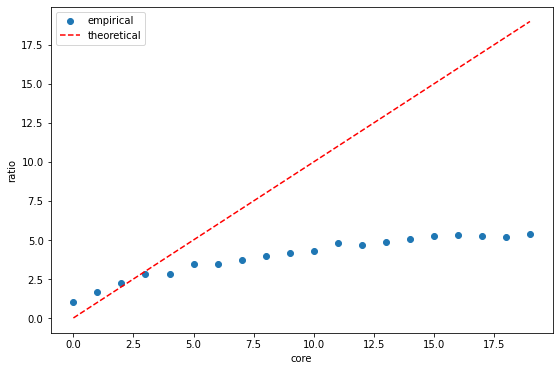

In [89]:
plt.figure(figsize=(9,6))
plt.scatter(cores, [r3[0]/r for r in r3])
plt.plot(cores, color = 'red', linestyle="--")
plt.legend(['empirical', 'theoretical'])
plt.xlabel("core")
plt.ylabel("ratio")
plt.savefig("./figures/r3")

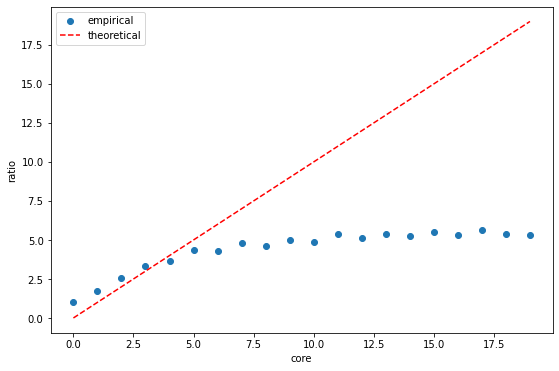

In [90]:
plt.figure(figsize=(9,6))
plt.scatter(cores, [r4[0]/r for r in r4])
plt.plot(cores, color = 'red', linestyle="--")
plt.legend(['empirical', 'theoretical'])
plt.xlabel("core")
plt.ylabel("ratio")
plt.savefig("./figures/r4")

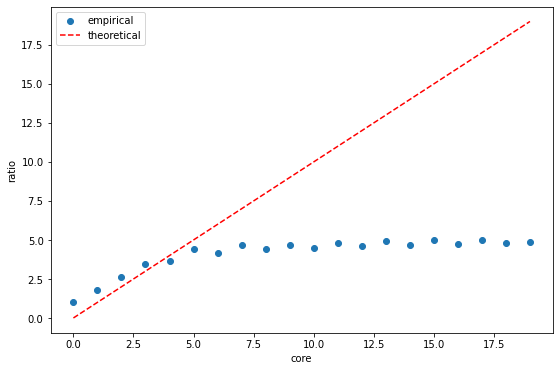

In [91]:
plt.figure(figsize=(9,6))
plt.scatter(cores, [r5[0]/r for r in r5])
plt.plot(cores, color = 'red', linestyle="--")
plt.legend(['empirical', 'theoretical'])
plt.xlabel("core")
plt.ylabel("ratio")
plt.savefig("./figures/r5")

## Bar plots for bottleneck visualization

In [44]:
import re 

def aggregate_dat(fname, reduce_op = np.mean):
    """
    take in the file name and output dict of aggregate values 
    """
    dat = []
    with open(fname) as f:
        dat = f.read()

    keys = ['assemble', 'setup', 'solve']
    
    return_dict = {}
    for k in keys:
        #let's do a positive look behind and keep track of our name 
        search_expr = "(?<=" + k + "': )" + "\d+\.\d+"
        found = re.findall(search_expr, dat)
        
        #data still strings so let's convert numerics to a dict 
        #print(found)
        found = list(map(float, found))
        
        #apply aggregate function 
        return_dict[k] = reduce_op(found)
    
    return return_dict

In [45]:
aggregate_dat("./data/5core.txt", reduce_op = np.mean)

{'assemble': 0.6691011077000001, 'setup': 0.274269972, 'solve': 4.0665451308}

In [46]:
c5 = aggregate_dat("./data/5core.txt", reduce_op = np.mean)
c10 = aggregate_dat("./data/10core.txt", reduce_op = np.mean)
c20 = aggregate_dat("./data/20core.txt", reduce_op = np.mean)

In [81]:
c10

{'assemble': 0.40711482969999996, 'setup': 0.2001569065, 'solve': 3.0367955537}

In [50]:
#proportional allocation
c5 = {k: v/(sum(c5.values())) for k,v in c5.items()}
c10 = {k: v/(sum(c10.values())) for k,v in c10.items()}
c20 = {k: v/(sum(c20.values())) for k,v in c20.items()}

In [86]:
c10

{'assemble': 0.11171989903379966,
 'setup': 0.05492678663063126,
 'solve': 0.8333533143355691}

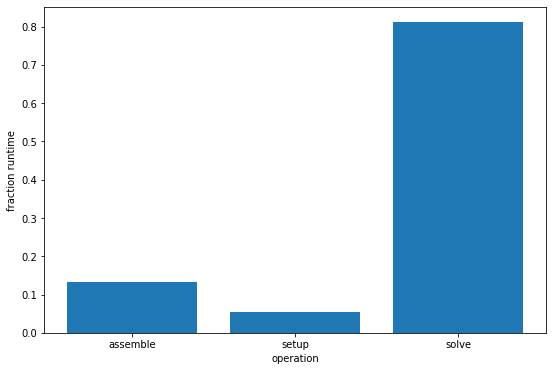

In [92]:
plt.figure(figsize=(9,6))
plt.bar(c5.keys(), c5.values())
plt.xlabel("operation")
plt.ylabel("fraction runtime")
plt.savefig("./figures/c5")

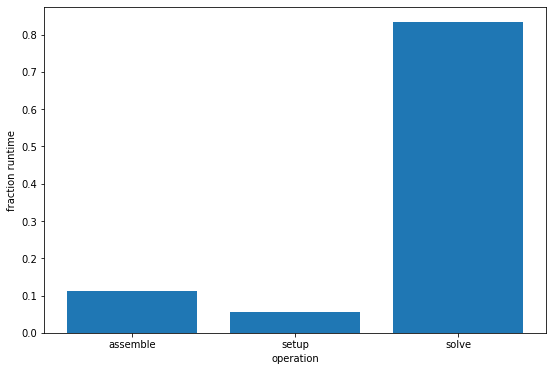

In [93]:
plt.figure(figsize=(9,6))
plt.bar(c10.keys(), c10.values())
plt.xlabel("operation")
plt.ylabel("fraction runtime")
plt.savefig("./figures/c10")

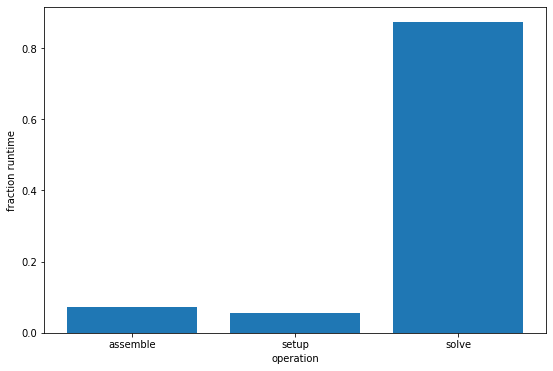

In [94]:
plt.figure(figsize=(9,6))
plt.bar(c20.keys(), c20.values())
plt.xlabel("operation")
plt.ylabel("fraction runtime")
plt.savefig("./figures/c20")

## KDE Plots for py vs cpp

In [5]:
py = np.loadtxt("data/python.txt", dtype=float)
cpp = np.loadtxt("data/cpp.txt", dtype=float)

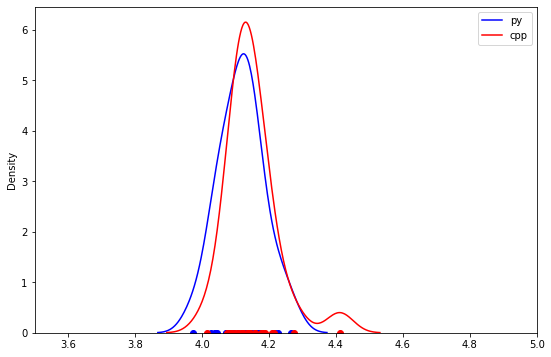

In [15]:
plt.figure(figsize=(9,6))
sns.kdeplot(py, color='blue')
sns.kdeplot(cpp, color = 'red')
plt.scatter(py, np.zeros(25), color='blue')
plt.scatter(cpp, np.zeros(25), color='red')
plt.legend(['py', 'cpp'])
plt.xlim([3.5, 5])
plt.savefig("./figures/pycpp")

In [ ]:
from scipy.stats import bartlett, chi2

In [55]:
bartlett(py,cpp)

BartlettResult(statistic=0.3493895781113716, pvalue=0.5544588786276496)

## Subplots

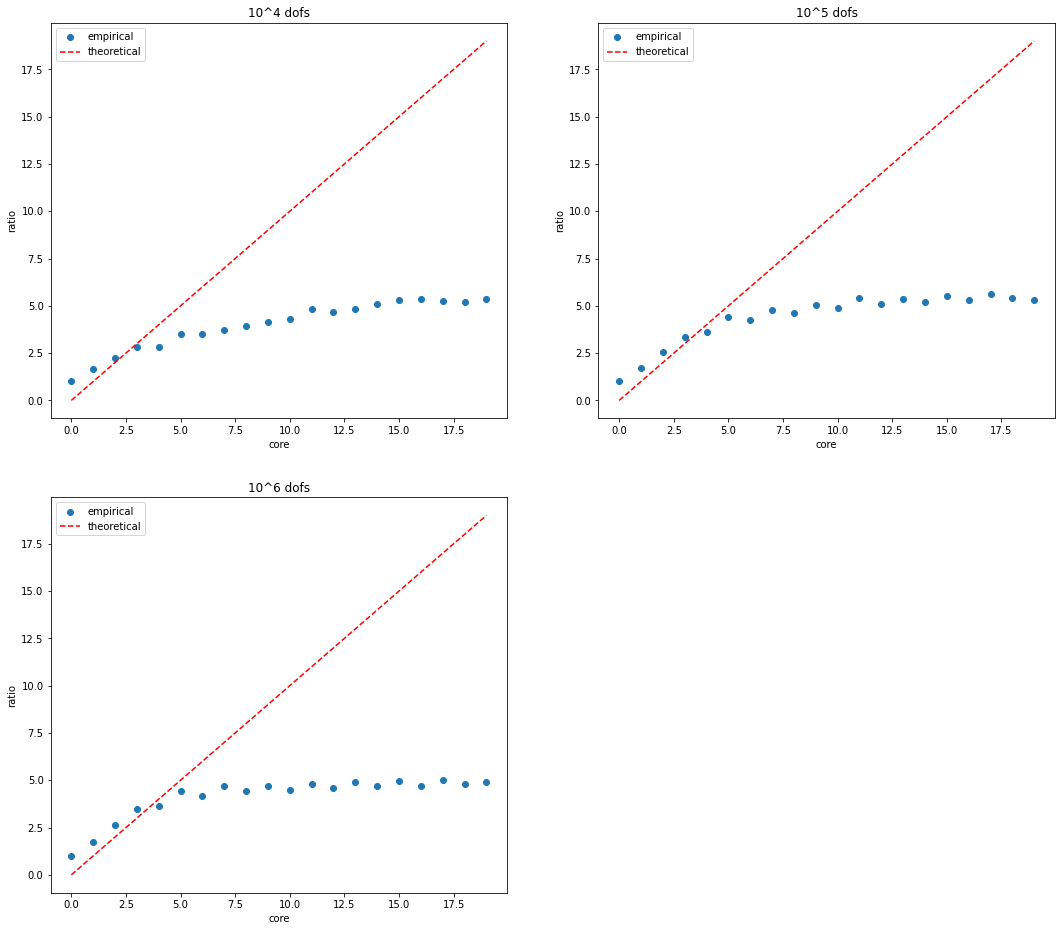

In [42]:
#speed ups 
fig, ax = plt.subplots(2,2,figsize=(18,16))
ax[0][0].scatter(cores, [r3[0]/r for r in r3])
ax[0][0].plot(cores, color = 'red', linestyle="--")
ax[0][0].legend(['empirical', 'theoretical'])
ax[0][0].set_xlabel("core")
ax[0][0].set_ylabel("ratio")
ax[0][0].set_title(f'10^4 dofs')

ax[0][1].scatter(cores, [r4[0]/r for r in r4])
ax[0][1].plot(cores, color = 'red', linestyle="--")
ax[0][1].legend(['empirical', 'theoretical'])
ax[0][1].set_xlabel("core")
ax[0][1].set_ylabel("ratio")
ax[0][1].set_title(f'10^5 dofs')

ax[1][0].scatter(cores, [r5[0]/r for r in r5])
ax[1][0].plot(cores, color = 'red', linestyle="--")
ax[1][0].legend(['empirical', 'theoretical'])
ax[1][0].set_xlabel("core")
ax[1][0].set_ylabel("ratio")
ax[1][0].set_title(f'10^6 dofs')

ax[1][1].get_xaxis().set_visible(False)
ax[1][1].get_yaxis().set_visible(False)
ax[1][1].axis('off')
plt.savefig("./figures/speedup")

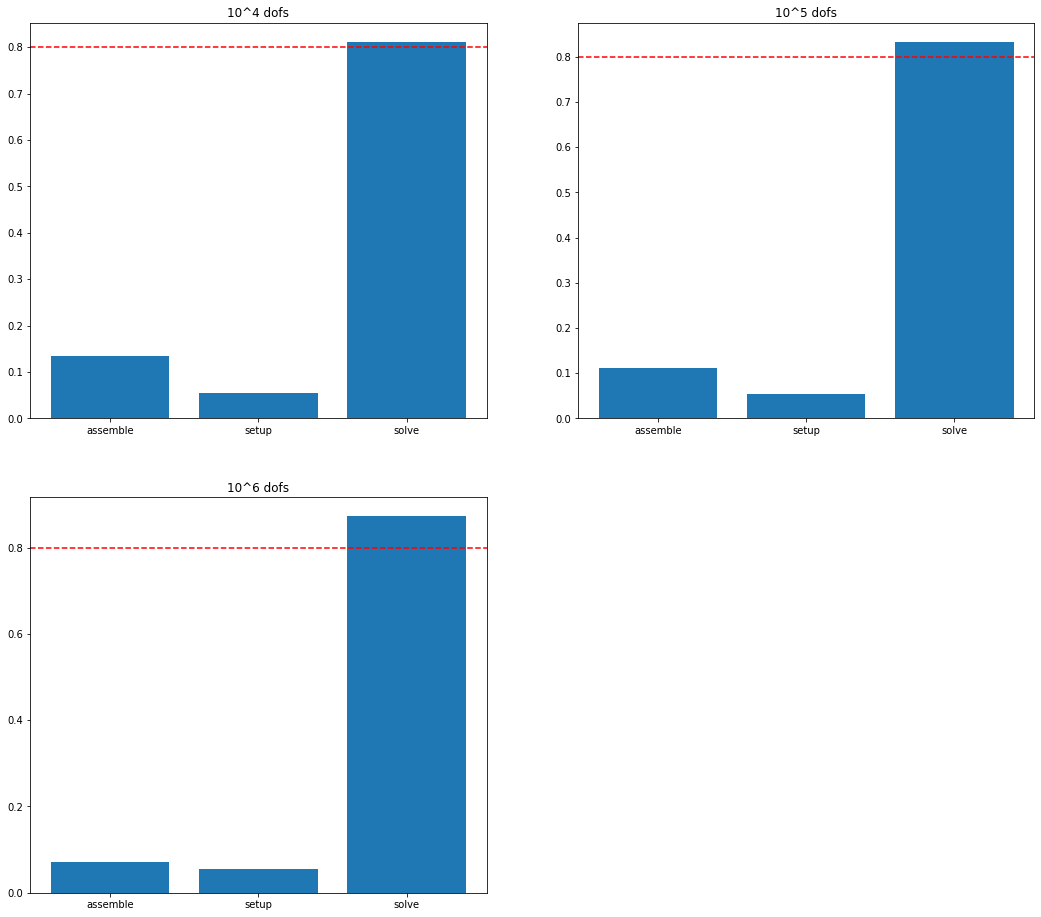

In [52]:
#bottlenecks 
fig, ax = plt.subplots(2,2,figsize=(18,16))
ax[0][0].bar(c5.keys(), c5.values())
ax[0][0].set_title(f'10^4 dofs')
ax[0][0].axhline(y=0.8, color='red',linestyle='--')

ax[0][1].bar(c10.keys(), c10.values())
ax[0][1].set_title(f'10^5 dofs')
ax[0][1].axhline(y=0.8, color='red',linestyle='--')

ax[1][0].bar(c20.keys(), c20.values())
ax[1][0].set_title(f'10^6 dofs')
ax[1][0].axhline(y=0.8, color='red',linestyle='--')

ax[1][1].get_xaxis().set_visible(False)
ax[1][1].get_yaxis().set_visible(False)
ax[1][1].axis('off')
plt.savefig("./figures/barplots")